In [301]:
import keras
import tensorflow as tf

import numpy as np
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt

In [302]:
china = load_sample_image('china.jpg')  / 255
flowers = load_sample_image('flower.jpg') / 255

In [303]:
china.shape

(427, 640, 3)

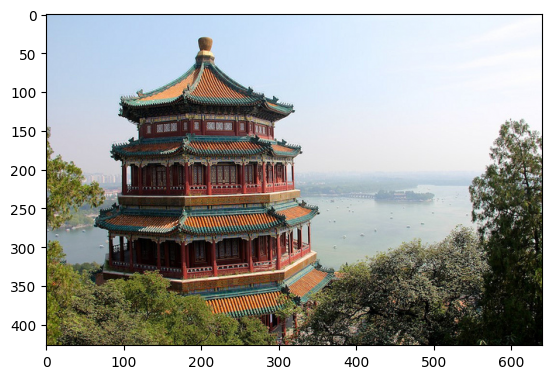

In [304]:
plt.imshow(china)
plt.show()

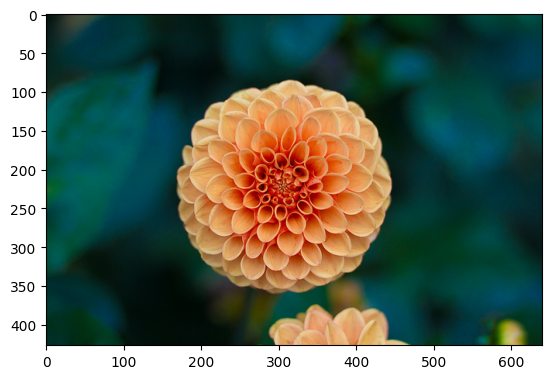

In [305]:
plt.imshow(flowers)
plt.show()

In [306]:
Image = np.array([china, flowers])
Image.shape

(2, 427, 640, 3)

In [307]:
batch_size , height, width, channels = Image.shape

In [308]:
filtros = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)

In [309]:
filtros[1, :, :, 0] = 1

In [310]:
filtros[3, :, :, 1] = 1

In [311]:
output = tf.nn.conv2d(Image, filters=filtros, strides=1, padding='SAME')

In [312]:
output[0,0,0,1] + output[0,0,639,1]

<tf.Tensor: shape=(), dtype=float64, numpy=21.352941176470587>

In [313]:
keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='SAME')

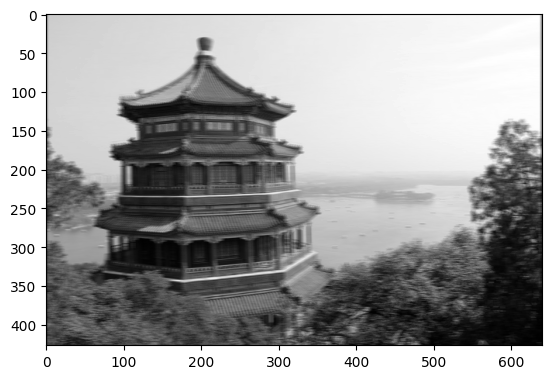

In [314]:
plt.imshow(output[0,:,:,1], cmap='gray')

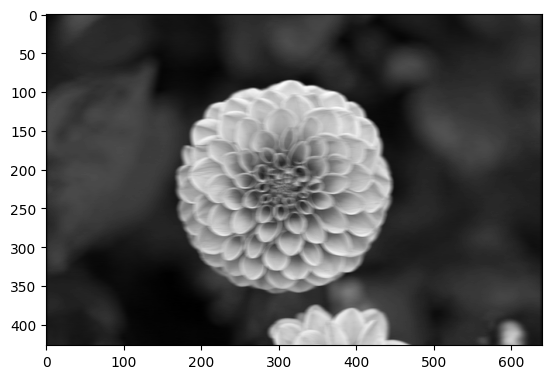

In [315]:
plt.imshow(output[1,:,:,1], cmap='gray')


## Convalocional Exemplo algoritmo

In [393]:
def convolucional(image, filters, kernel=None, strides=1, padding='valid', random=False):
    if random:
        altura  = image.shape[0] //filters
        largura = image.shape[1] //filters
        
        kernel  = np.around(np.random.random((altura, largura)))

    if len(image.shape) == 3: image = image[:,:,0]
    
    if (padding == 'same'):
        image = np.pad(image, 1, mode='constant', constant_values=0) 


    height , width = image.shape[:2]

    saidaAltura  = (height - kernel.shape[0])//strides + 1
    saidaLargura = (width  - kernel.shape[1])//strides + 1

    saida = np.zeros(shape=(saidaAltura, saidaLargura))

    for i in range(0, saidaAltura):
        for j in range(0, saidaLargura):
            regiao = image[i * 1: i * 1 + kernel.shape[0] ,
                           j * 1: j * 1 + kernel.shape[1]] 
            saida[i, j] = np.sum(regiao * kernel)
    return saida

In [387]:
def pooling(image, filter, strides=1, padding='valid', random=False, type='max'):
    if random:
        altura  = image.shape[0] //filter
        largura = image.shape[1] //filter
        
        kernel  = np.around(np.random.random((altura, largura)))

    if (padding == 'same'):
        image = np.pad(image, 1, mode='constant', constant_values=0) 

    if len(image.shape) == 3:
        image = image[:,:,0]
    height , width = image.shape[:2]

    saidaAltura  = (height - kernel.shape[0])//strides + 1
    saidaLargura = (width  - kernel.shape[1])//strides + 1

    saida = np.zeros(shape=(saidaAltura, saidaLargura))
    for i in range(0, saidaAltura):
        for j in range(0, saidaLargura):
            regiao = image[i * 1: i * 1 + kernel.shape[0] ,
                           j * 1: j * 1 + kernel.shape[1]] 
            match type:
                case 'max':
                    saida[i, j] = np.max(regiao)
                case 'avg':
                    saida[i, j] = np.average(regiao)

    return saida

In [388]:
china.shape[:1]

(427,)

In [394]:
result = convolucional(china, 64, strides=2,random=True, padding='same')

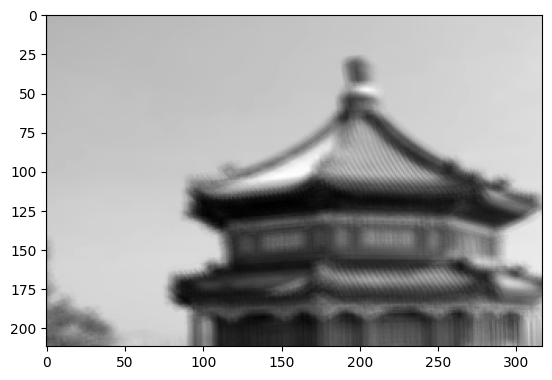

In [405]:
plt.imshow(result,cmap='gray')
plt.show()

In [396]:
poolin = pooling(china, 32, random=True, type='avg', strides=2)

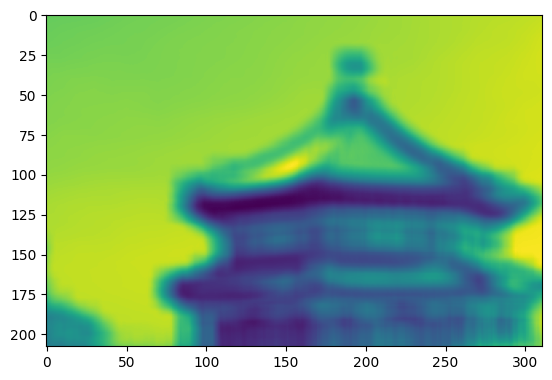

In [397]:
plt.imshow(poolin)

In [398]:
china.shape,result.shape, poolin.shape

((427, 640, 3), (212, 317), (208, 311))

In [402]:
pool = tf.nn.max_pool(china, ksize=43, strides=2, padding='SAME')

In [403]:
pool.shape

TensorShape([427, 320, 3])

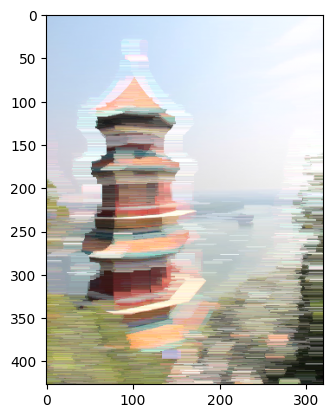

In [404]:
plt.imshow(pool)

In [386]:
import numpy as np

# Crie uma matriz de exemplo
matriz = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# Defina a quantidade de zeros a serem adicionados em cada borda
qtd_zeros = 2

# Use numpy.pad para adicionar zeros na borda
matriz_com_zeros = np.pad(matriz, qtd_zeros, mode='constant', constant_values=0)

print("Matriz original:")
print(matriz)
print("\nMatriz com zeros na borda:")
print(matriz_com_zeros)


Matriz original:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Matriz com zeros na borda:
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 2 3 0 0]
 [0 0 4 5 6 0 0]
 [0 0 7 8 9 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
